(calculus-appendix)=
# Per liberarvi dai terrori preliminari 

Fornisco qui la traduzione del primo capitolo di [Calculus made easy](https://calculusmadeeasy.org/1.html).

Il terrore preliminare, che impedisce alla maggior parte dei ragazzi di quinta anche solo di tentare di imparare l'analisi, può essere abolito una volta per tutte semplicemente affermando qual è il significato -- in termini di buon senso -- dei due simboli principali che sono usati nell'analisi matematica.

Questi terribili simboli sono:

1.  $d$ che significa semplicemente "un po' di". Quindi $\operatorname{d}\!x$ significa un po' di $x$; o $\operatorname{d}\!u$ significa un po' di $u$. I matematici pensano che sia più educato dire "un elemento di" invece di "un po' di". Fai come ti pare. Ma scoprirai che questi piccoli pezzi (o elementi) possono essere considerati indefinitamente piccoli.

2.  $\int$ che è semplicemente una S allungata, e può essere chiamata (se volete) "la somma di". Quindi $\int \operatorname{d}\!x$ significa la somma di tutti i pezzettini di $x$; oppure $\int \operatorname{d}\!t$ significa la somma di tutti i pezzettini di $t$. I matematici chiamano questo simbolo "l'integrale di". Ora qualsiasi sciocco può vedere che se $x$ è considerato come composto da tanti piccoli pezzetti, ognuno dei quali è chiamato $\operatorname{d}\!x$, se li sommi tutti insieme ottieni la somma di tutti i $\operatorname{d}\!x$, (che è la stessa cosa dell'insieme di $x$). La parola "integrale" significa semplicemente "il tutto". Se pensi alla durata di un'ora, puoi (se vuoi) pensarla come suddivisa in 3600 piccoli pezzetti chiamati secondi. L'insieme dei 3600 pezzetti sommati fa un'ora. Quando vedrete un'espressione che inizia con questo simbolo terrificante, d'ora in poi saprete che è stato messo lì semplicemente per darvi l'istruzione che ora dovete eseguire (se potete) l'operazione di sommare tutti i piccoli pezzetti che sono indicati dai simboli che seguono.

È tutto.

Verifichiamo con una simulazione. Importiamo le librerie necessarie.

In [1]:
# Dependencies
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
from scipy.constants import pi
from scipy.constants import golden


In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
sns.set(color_codes=True)
az.style.use("arviz-darkgrid")
sns.set_theme(
    context="paper",
    palette="colorblind",
)

Nella cella seguente definisco la funzione di densità gaussiana:

$$
f(x; \mu, \sigma) = {1 \over {\sigma\sqrt{2\pi} }} \exp \left\{-\frac{(x - \mu)^2}{2 \sigma^2} \right\}.
$$ 


In [7]:
def gaussian(x, mu, sigma):
    return (
        1 / (sigma * np.sqrt(2 * pi)) * np.exp((-1 * (x - mu) ** 2) / (2 * sigma**2))
    )


Definisco i parametri della funzione e creo un grande numero di valori $x$ nell'intervallo [-10, 10]. Il vettore `fx` contiene l'ordinata della funzione per ciascuno dei punti `x_range` che sono stati definiti.

In [8]:
mu = 0
sigma = 1
# Define bounds of integral
a = -10
b = 10
n = 10000
# Generate function values
x_range = np.linspace(a, b, n)
fx = gaussian(x_range, mu, sigma)


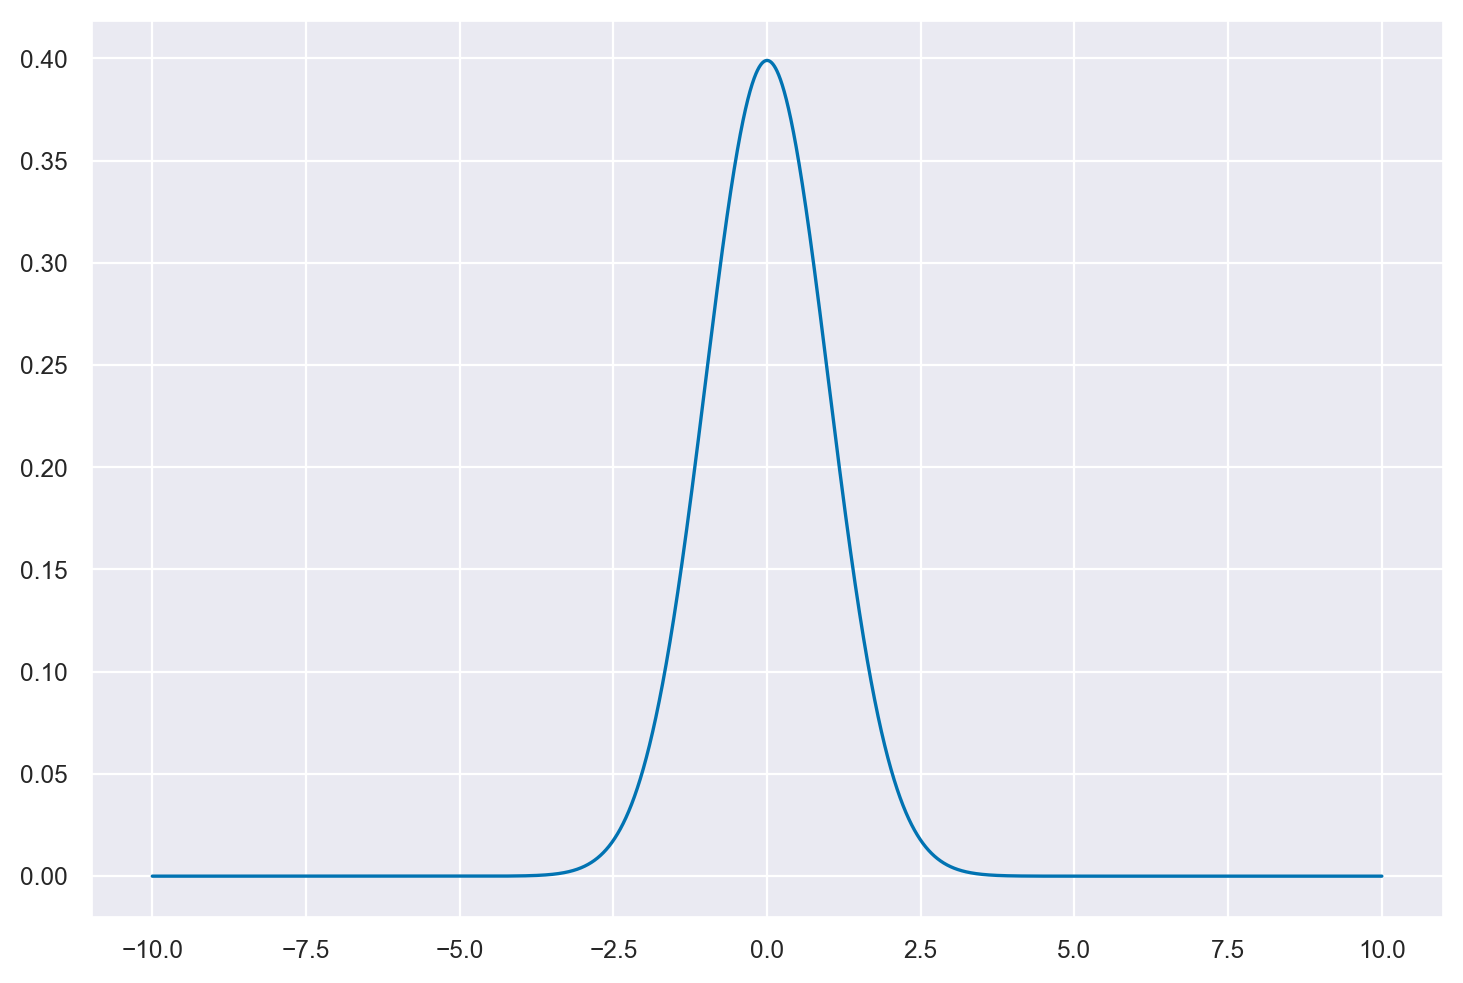

In [10]:
_ = plt.plot(x_range, fx, "b-")

Creo ora una funzione che *approssima* l'integrale facendo semplicemente la somma dei prodotti dell'ordinata della funzione moltiplicati per $\Delta x$, ovvero, nel caso presente, 20 / 10000. 

In [11]:
def integral_approximation(f, a, b, n):
    delta = (b - a) / n
    return np.sum(delta * f)


Sappiamo che la funzione di densità ha un'area unitaria. Usiamo la funzione precedente per calcolare l'intergrale della funzione nell'intervallo [-10, 10].

In [12]:
approx = integral_approximation(fx, a, b, n)
approx

0.9999000000000001

Usiamo ora l'approssimazione di SciPy.

In [13]:
# Scipy approximation
integrate.quad(
    lambda x: 1 / (sigma * np.sqrt(2 * pi)) * np.exp((-1 * (x - mu) ** 2) / (2 * sigma**2)),
    a,
    b,
)


(1.0, 8.671029987439099e-10)

È noto che il 95% dell'area sottesa dalla curva della distribuzione normale standardizzata è contenuta nell'intervallo compreso tra -1.96 e 1.96. Per replicare questo risultato, iniziamo usando la funzione approssimata.

In [14]:
a = -1.96
b = 1.96
n = 10000
x_range = np.linspace(a, b, n)
fx = gaussian(x_range, mu, sigma)

# Our integral approximation function
def integral_approximation(f, a, b, n):
    delta = (b - a) / n
    return  np.sum(delta * f)

approx = integral_approximation(fx, a, b, n)
approx

0.9499321151989195

Confrontiamo il risultato ottenuto utilizzando l'approssimazione con quello calcolato tramite la libreria SciPy.

In [15]:
# Scipy approximation
integrate.quad(
    lambda x: 1 / (sigma * np.sqrt(2 * pi)) * np.exp((-1 * (x - mu) ** 2) / (2 * sigma**2)),
    a,
    b,
)

(0.9500042097035591, 1.0474096492701335e-11)

È noto che l'area della curva della distribuzione normale compresa tra più e meno una deviazione standard dalla media corrisponde a circa il 68% del totale. Per riprodurre questo risultato usiamo la nostra approssimazione:

In [16]:
a = -1.0
b = 1.0
n = 10000
x_range = np.linspace(a, b, n)
fx = gaussian(x_range, mu, sigma)

# Our integral approximation function
def integral_approximation(f, a, b, n):
    delta = (b - a) / n
    return  np.sum(delta * f)

approx = integral_approximation(fx, a, b, n)
approx

0.6826696157194765

Confrontiamo il risultato ottenuto utilizzando l'approssimazione con quello calcolato tramite la libreria SciPy.

In [17]:
# Scipy approximation
integrate.quad(
    lambda x: 1 / (sigma * np.sqrt(2 * pi)) * np.exp((-1 * (x - mu) ** 2) / (2 * sigma**2)),
    a,
    b,
)

(0.682689492137086, 7.579375928402476e-15)

In sintesi, per calcolare l'integrale di una funzione di densità in un intervallo, è possibile procedere suddividendo l'area sotto la curva in intervalli di larghezza costante. In ogni intervallo, si moltiplica l'ordinata della funzione per la larghezza dell'intervallo. Si sommano poi questi prodotti per tutti gli intervalli. Una tale somma darà un'idea dell'area sottesa dalla curva e quindi dell'integrale della funzione di densità nell'intervallo considerato.

## Watermark

In [18]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sat May 06 2023

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.13.2

matplotlib: 3.7.1
numpy     : 1.24.3
arviz     : 0.15.1
seaborn   : 0.12.2
scipy     : 1.10.1

Watermark: 2.3.1

